In [2]:
%matplotlib inline

%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

import cv2
import numpy as np
import pandas as pd
import skimage

import pims
import trackpy as tp
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(20,12))
mpl.rc('image', cmap='gray')

<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

In [2]:
#Here, you can change where the image files are being fetched from. 
fileName = 'square aggregation.png'
prefix = './data/'
path = prefix + fileName

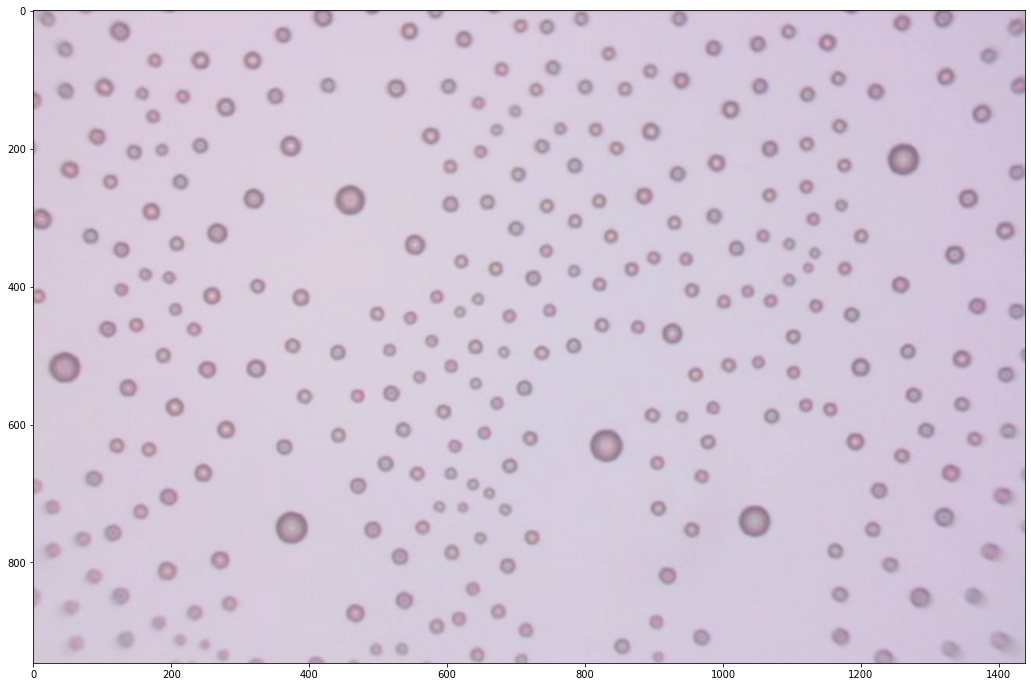

In [3]:
#This displays the first image in the progression, and imports all of them. 
imraw = plt.imread(path)
plt.imshow(imraw)


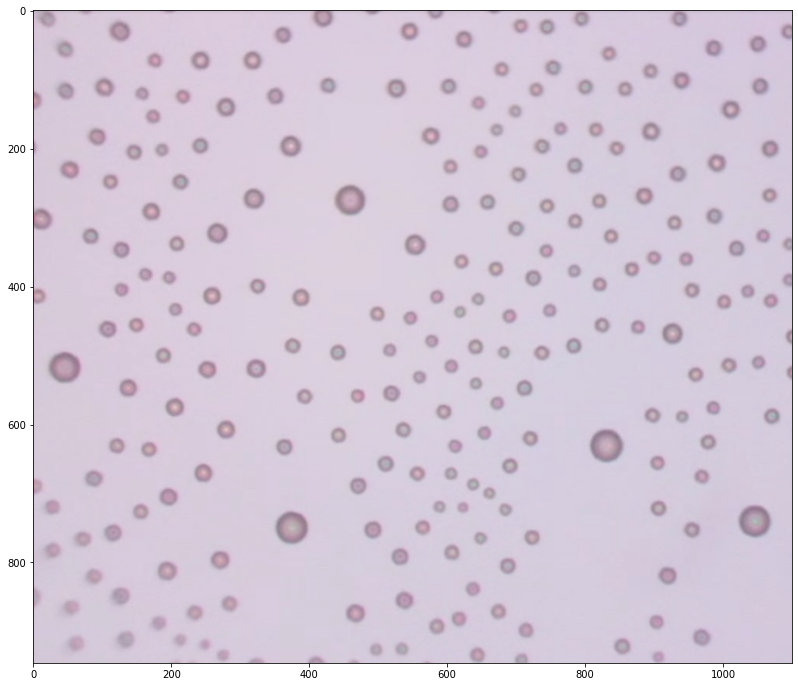

In [4]:
def crop(img):
    x_min = 0
    x_max = 1100
    y_min = 0
    y_max = 990
    return img[y_min:y_max,x_min:x_max]

im = crop(imraw)


plt.imshow(im)


<ipython-input-5-7b1e2aefb609>:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  imgc = skimage.color.rgb2gray(imgc)


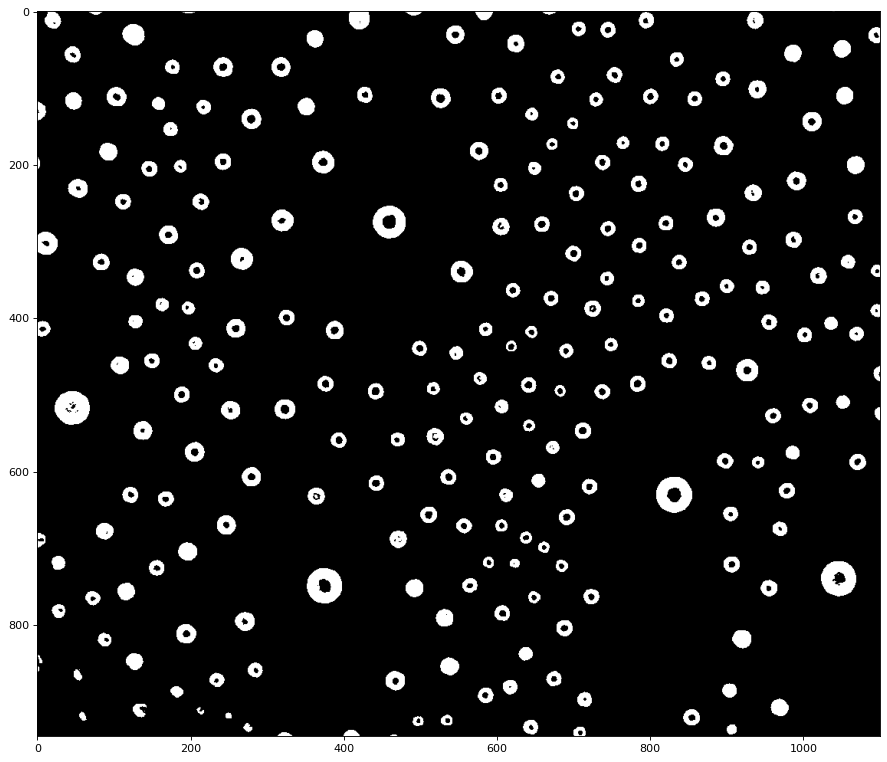

In [5]:
#This converts the image to a binary, black and white file so that the islands can be tracked. 
from scipy import ndimage
from skimage import morphology, util, filters
import cv2
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')


def preprocess_film(img):
    imgc = crop(img)
    imgc = skimage.color.rgb2gray(imgc)
    
    threshold = .67
    idx = imgc > threshold
    idx2 = imgc < threshold
    idx3 = imgc == threshold
    imgc[idx] = 0
    imgc[idx2] = 255
    imgc[idx3] = 255
    
    
    return imgc

im = preprocess_film(imraw)
# im = skimage.color.rgb2gray(im)
# frames = preprocess_film(pims.open(os.path.join(datapath, prefix + '*.tif')))

# frames = pims.open(os.path.join(datapath, prefix + '*.tif'))
#print(frames[id_example])

plt.imshow(im)



Found 241 features


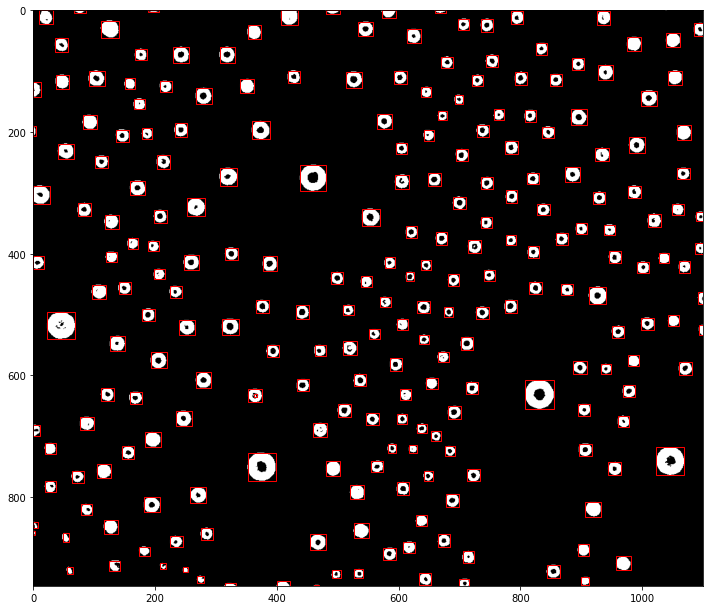

In [6]:
import skimage
import matplotlib.patches as mpatches

white = 0
label_image, number_of_labels = skimage.measure.label(im, background=white, return_num=True)
print("Found %d features"%(number_of_labels))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.imshow(im, cmap='gray')
for region in skimage.measure.regionprops(label_image, intensity_image=im):
    if region.area < 10 or region.area > 3000:
        continue
        
    if region.mean_intensity < 1:
        continue
    
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc -minc, maxr - minr, 
                             fill=False, edgecolor='red', linewidth=1)
    
    ax.add_patch(rect)

In [7]:
#Stores these images in a panda sequence
features = pd.DataFrame()

label_image, number_of_labels = skimage.measure.label(im, background=white, return_num=True)

index = 0

for region in skimage.measure.regionprops(label_image, intensity_image=im):
    if region.area < 10 or region.area > 3000:
        continue
        
    if region.mean_intensity < 1:
        continue
    index += 1
    features = features.append([{'index':index, 'y':region.centroid[0], 'x':region.centroid[1], 'radius':np.sqrt(region.area/np.pi)}])
features = features.set_index('index')

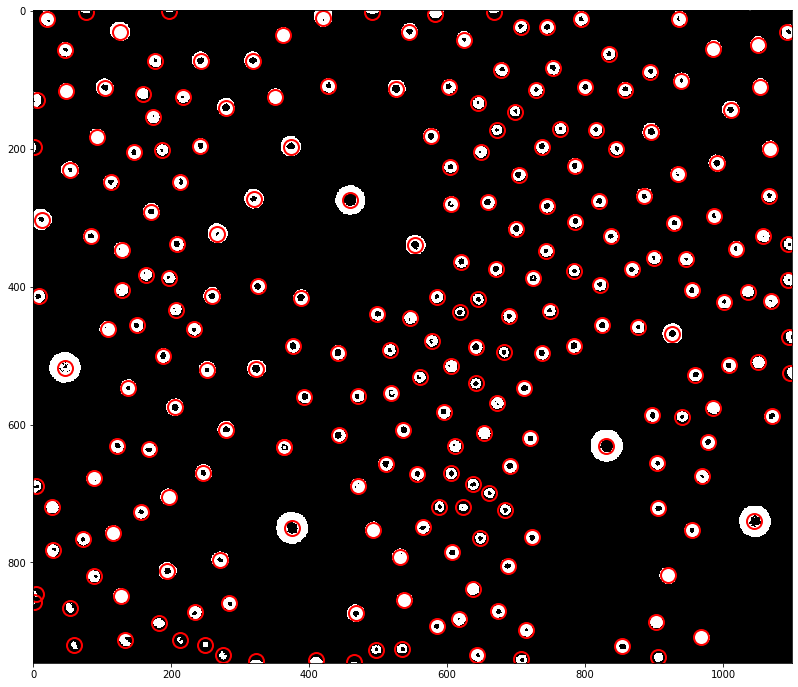

<AxesSubplot:>

In [8]:
#Displays the features which will be tracked in the next part
tp.annotate(features, im)

In [9]:
# numFeatures = len(features.index)
# closest = []

# for p in range(1, numFeatures+1):
#     testRange = features.drop(p, axis=0)
#     distances = []

#     for i in range(1, p-1):
#         start = features.loc[p,:]
#         end = testRange.loc[i,:]
#         sx = start.x
#         ex = end.x
#         sy = start.y

#         sr = start.radius
#         er = end.radius

#         dx = (sx-ex)*(sx-ex)
#         dy = (sy-ey)*(sy-ey)

        
#         dist = np.sqrt(dx+dy) - sr - er
#         if dist > 0:
#             distances = np.append(distances, dist)

#     for o in range(p+1, numFeatures):
#         start = features.loc[p,:]
#         end = testRange.loc[o,:]
#         sx = start.x
#         ex = end.x
#         sy = start.y
#         ey = end.y

#         sr = start.radius
#         er = end.radius

#         dx = (sx-ex)*(sx-ex)
#         dy = (sy-ey)*(sy-ey)
        
#         dist = np.sqrt(dx+dy) - sr - er
#         if dist > 0:
#             distances = np.append(distances, dist)
    
#     close=np.amin(distances)
#     closest = np.append(closest,close)
#     # features = features.append([{'closest':close}])

# features['Seperation (px)']=closest
# maxd = np.amax(closest)
# mind = np.amin(closest)
# devd = np.std(closest)
# avclosest = np.average(closest)
# print("the average seperation of the features is ", avclosest, " pixels, with a standard deviation of ", devd)

the average seperation of the features is  36.00907593929735  pixels, with a standard deviation of  15.025221386083631


In [3]:
data = pd.read_csv('C:/Users/Keith/Desktop/SVM/IslandDetecion-master/islandCenters.csv')
data = data.drop_duplicates()
data = data.reset_index()
print(data)

     index     x    y  radius
0        0  1236  935   40.25
1        1   854  921   29.75
2        3  1170  907   33.25
3        4   714  898   26.50
4        6   903  886   26.25
..     ...   ...  ...     ...
238    412   937   13   28.50
239    414   795   13   26.50
240    415  1320   13   34.75
241    416   582    6   25.25
242    417   421   12   34.25

[243 rows x 4 columns]


In [4]:
numFeatures = len(data.index)
closest = []

for p in range(0, numFeatures):
    testRange = data.drop(p, axis=0)
    distances = []

    for i in range(0, p-1):
        start = data.loc[p,:]
        end = testRange.loc[i,:]
        sx = start.x
        ex = end.x
        sy = start.y

        sr = start.radius
        er = end.radius

        dx = (sx-ex)*(sx-ex)
        dy = (sy-ey)*(sy-ey)

        
        dist = np.sqrt(dx+dy)
        if dist > 20:
            distances = np.append(distances, dist)

    for o in range(p+1, numFeatures-1):
        start = data.loc[p,:]
        end = testRange.loc[o,:]
        sx = start.x
        ex = end.x
        sy = start.y
        ey = end.y

        sr = start.radius
        er = end.radius

        dx = (sx-ex)*(sx-ex)
        dy = (sy-ey)*(sy-ey)
        
        dist = np.sqrt(dx+dy)
        if dist > 20:
            distances = np.append(distances, dist)
    
    close=np.amin(distances)
    closest = np.append(closest,close)
    # features = features.append([{'closest':close}])

data['seperation']=closest
maxd = np.amax(closest)
mind = np.amin(closest)
devd = np.std(closest)
avclosest = np.average(closest)
print("the average seperation of the features is ", avclosest, " pixels, with a standard deviation of ", devd)

the average seperation of the features is  59.16699647975681  pixels, with a standard deviation of  19.217058415605845


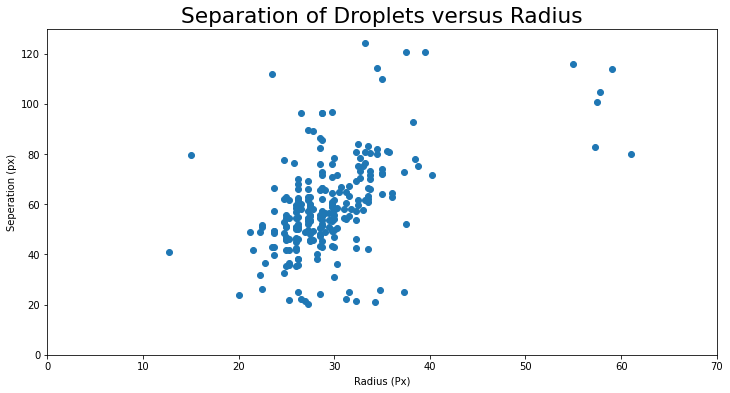

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=18)
plt.xlim([0,70])
plt.ylim([0,130])
plt.xlabel('Radius (Px)')
plt.ylabel('Seperation (px)')
ax.set_title('Separation of Droplets versus Radius')
ax.scatter(data.radius, data.seperation)